In [1]:
import numpy as np
import pandas as pd

In [2]:
with open("./IMA_mineral_names.txt", 'r') as f:
    names = [line.strip().lower() for line in f]

In [3]:
df = pd.DataFrame({'name' : names})

In [4]:
from string import ascii_lowercase

In [5]:
df['set'] = df['name'].apply(set)
df['letter_set'] = df['name'].apply(lambda x: "".join(sorted(set(x))))
df['letter_len'] = df['name'].apply(len)
df['set_len'] = df['set'].apply(len)

In [6]:
df.head()

,name,set,letter_set,letter_len,set_len
0,abellaite,"{l, a, t, e, b, i}",abeilt,9,6
1,abelsonite,"{l, o, a, t, e, b, i, s, n}",abeilnost,10,9
2,abernathyite,"{h, a, y, t, e, b, r, i, n}",abehinrty,12,9
3,abhurite,"{h, a, t, i, b, r, e, u}",abehirtu,8,8
4,abramovite,"{v, m, o, a, t, i, b, r, e}",abeimortv,10,9


In [7]:
subset_groups = {}
for group in np.sort(df['letter_set']):
    mineral_names = list(df.loc[df['letter_set'] == group, 'name'].values)
    # check if minerals can be put inside different subgroups
    for key in subset_groups.keys():
        if all([chr_ in key for chr_ in group]):
            subset_groups[key].extend(mineral_names)
    subset_groups[group] = mineral_names
subset_groups = {key : sorted(set(values)) for key, values in subset_groups.items()}

In [8]:
subset_groups_len = {}
subset_groups_relative_len = {}
subset_len = {}
for key in sorted(subset_groups, reverse=True):
    subset_len[key] = len(key)
    subset_groups_len[key] = len(subset_groups[key])
    subset_groups_relative_len[key] = len(subset_groups[key])/len(key)

In [9]:
df_subsets = pd.DataFrame.from_dict({
        'subset_groups' : subset_groups,
        'len' : subset_len,
        'set_len' : subset_groups_len,
        'relative_len' : subset_groups_relative_len
        }).reset_index(drop=False)
df_subsets.rename(columns={'index' : 'name'}, inplace=True)

In [10]:
df_subsets.sort_values(by='relative_len', ascending=False).head(50)

,name,len,relative_len,set_len,subset_groups
338,acdeghilmnorst,14,64.500000,903,"[acanthite, acetamide, achalaite, acmonidesite..."
442,aceghilmnoprst,14,61.571429,862,"[acanthite, achalaite, actinolite, aegirine, a..."
108,abdehilmnorstuy,15,60.666667,910,"[abellaite, abelsonite, abernathyite, abhurite..."
352,acdehilmnoprtuy,15,54.066667,811,"[acanthite, acetamide, achalaite, actinolite, ..."
443,aceghilmnorst,13,52.000000,676,"[acanthite, achalaite, actinolite, aegirine, a..."
368,acdehimnoprstuy,15,50.533333,758,"[acanthite, acetamide, acmonidesite, acuminite..."
463,acegilmnorstu,13,48.769231,634,"[actinolite, acuminite, aegirine, aenigmatite,..."
13,abcdeilmnorst,13,46.615385,606,"[abellaite, abelsonite, acetamide, acmonidesit..."
355,acdehilmoprstu,14,43.071429,603,"[acetamide, achalaite, adachiite, adamite, ade..."
444,aceghilmnortu,13,41.076923,534,"[acanthite, achalaite, actinolite, acuminite, ..."


# Results

##### Notice, the results are incomplete (probably not even optimal)
the results are missing all the combined permutations, so only groups that are formed from mineral names are compared here

In [11]:
max_group_for_size = df_subsets.groupby(by='len').apply(lambda x: pd.Series({'group_len' : x['set_len'].max(),
                                                                             'group' : x.loc[x['set_len'].argmax(), 'name'],
                                                                             'list_group' : x.loc[x['set_len'].argmax(), 'subset_groups'],
                                                                             'relative_len' : x['set_len'].max()/len(x.loc[x['set_len'].argmax(), 'name'])
                                                                            })).reset_index(drop=False)
max_group_for_size['group_and_len'] = max_group_for_size.apply(lambda  x: "{} - {}".format(x['group'], x['len']), axis=1)
max_group_for_size

,len,group,group_len,list_group,relative_len,group_and_len
0,3,cei,1,[ice],0.333333,cei - 3
1,4,eilt,2,"[eitelite, leiteite]",0.500000,eilt - 4
2,5,eilst,10,"[eitelite, ellisite, ilesite, iltisite, iseite...",2.000000,eilst - 5
3,6,aeilst,25,"[aliettite, altaite, altisite, asisite, ateles...",4.166667,aeilst - 6
4,7,aeilnst,54,"[aliettite, altaite, altisite, anilite, asisit...",7.714286,aeilnst - 7
5,8,aeilmnst,82,"[aliettite, altaite, altisite, amesite, ammine...",10.250000,aeilmnst - 8
6,9,aeilnorst,138,"[aerinite, aiolosite, alarsite, aliettite, all...",15.333333,aeilnorst - 9
7,10,aeilmnorst,239,"[aerinite, aiolosite, alamosite, alarsite, ali...",23.900000,aeilmnorst - 10
8,11,aegilmnorst,350,"[aegirine, aenigmatite, aerinite, agaite, agma...",31.818182,aegilmnorst - 11
9,12,aegilmnorstu,467,"[aegirine, aenigmatite, aerinite, aerugite, ag...",38.916667,aegilmnorstu - 12


In [12]:
max_group_len = {}
for index, row in max_group_for_size.iterrows():
    max_group_len[row['len']] = row['list_group']
    if row['group_len'] < 100:
        print()
        print(row['group'])
        print(row['list_group'])


cei
['ice']

eilt
['eitelite', 'leiteite']

eilst
['eitelite', 'ellisite', 'ilesite', 'iltisite', 'iseite', 'itsiite', 'leiteite', 'lisetite', 'seelite', 'stilleite']

aeilst
['aliettite', 'altaite', 'altisite', 'asisite', 'atelestite', 'eitelite', 'ellisite', 'ilesite', 'iltisite', 'iseite', 'itsiite', 'lasalite', 'leiteite', 'lisetite', 'salesite', 'sasaite', 'seelite', 'sellaite', 'stilleite', 'stistaite', 'tassieite', 'teallite', 'tiettaite', 'tilasite', 'tsilaisite']

aeilnst
['aliettite', 'altaite', 'altisite', 'anilite', 'asisite', 'atelestite', 'eitelite', 'ellisite', 'enstatite', 'esseneite', 'ilesite', 'iltisite', 'inesite', 'innelite', 'iseite', 'itsiite', 'lasalite', 'leiteite', 'lenaite', 'lillianite', 'linnaeite', 'lintisite', 'lisetite', 'nasinite', 'natanite', 'natisite', 'nealite', 'nelenite', 'nielsenite', 'nisnite', 'salesite', 'santanaite', 'santite', 'sasaite', 'seelite', 'sellaite', 'silinaite', 'stannite', 'stilleite', 'stistaite', 'taenite', 'tantite', 'tassiei

In [13]:
max_group_for_size_and_friends = df_subsets.groupby(by='len').apply(lambda x: pd.DataFrame({'group_len' : x.loc[x['set_len'] == x['set_len'].max(), 
                                                                                                          'set_len'],
                                                                                            'group' : x.loc[x['set_len'] == x['set_len'].max(),
                                                                                                            'name'],
                                                                                            'list_group' : x.loc[x['set_len'] == x['set_len'].max(), 
                                                                                                                 'subset_groups'],
                                                                                            'relative_len' : x.loc[x['set_len'] == x['set_len'].max(),
                                                                                                                                   'set_len'] / \
                                                                                                             x.loc[x['set_len'] == x['set_len'].max(),
                                                                                                                   'name'].apply(len),
                                                                                           })).reset_index(drop=False)
max_group_for_size_and_friends.drop(['level_1'], axis=1, inplace=True)
max_group_for_size_and_friends['group_and_len'] = max_group_for_size_and_friends.apply(lambda  x: "{} - {}".format(x['group'], x['len']), axis=1)
max_group_for_size_and_friends

,len,group,group_len,list_group,relative_len,group_and_len
0,3,cei,1,[ice],0.333333,cei - 3
1,3,int,1,[tin],0.333333,int - 3
2,4,eilt,2,"[eitelite, leiteite]",0.500000,eilt - 4
3,4,eint,2,"[teineite, tin]",0.500000,eint - 4
4,4,eiot,2,"[itoite, ottoite]",0.500000,eiot - 4
5,4,eist,2,"[iseite, itsiite]",0.500000,eist - 4
6,4,eitw,2,"[tewite, wittite]",0.500000,eitw - 4
7,5,eilst,10,"[eitelite, ellisite, ilesite, iltisite, iseite...",2.000000,eilst - 5
8,6,aeilst,25,"[aliettite, altaite, altisite, asisite, ateles...",4.166667,aeilst - 6
9,6,aeinst,25,"[asisite, enstatite, esseneite, inesite, iseit...",4.166667,aeinst - 6


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Max only

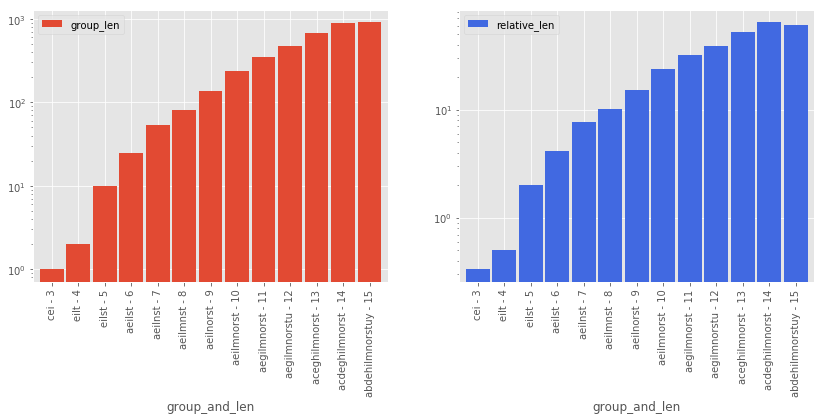

In [15]:
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(121)
ax = max_group_for_size.plot.bar(x='group_and_len', y='group_len', width=0.9, ax=ax)
ax.set_yscale('log')

ax = plt.subplot(122)
ax = max_group_for_size.plot.bar(x='group_and_len', y='relative_len', width=0.9, ax=ax, color='royalblue')
ax.set_yscale('log')


# Max and friends

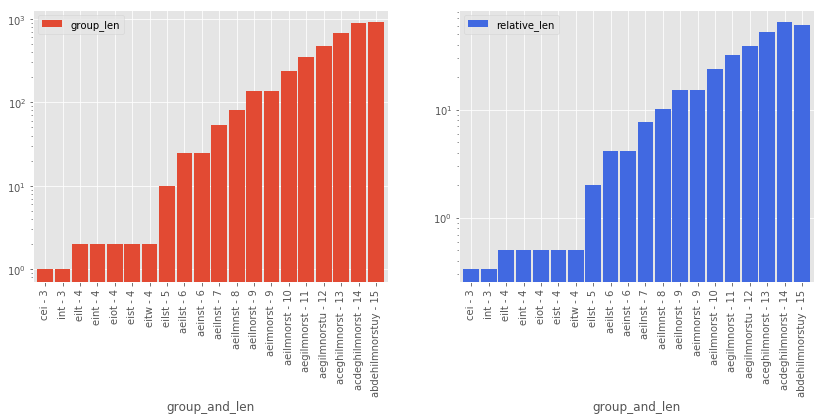

In [16]:
fig = plt.figure(figsize=(14,5))
ax = plt.subplot(121)
ax = max_group_for_size_and_friends.plot.bar(x='group_and_len', y='group_len', width=0.9, ax=ax)
ax.set_yscale('log')

ax = plt.subplot(122)
ax = max_group_for_size_and_friends.plot.bar(x='group_and_len', y='relative_len', width=0.9, ax=ax, color='royalblue')
ax.set_yscale('log')